In [15]:
import pandas as pd
import numpy as np
df = pd.read_excel('FinalV2.xlsx')

df = df.replace("?",np.nan)
len(df.select_dtypes('O').columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Columns: 101 entries, gender to readmitted
dtypes: float64(3), int64(95), object(3)
memory usage: 78.4+ MB


In [17]:
# Count missing values 
missing_values = df.isnull().sum()
print("Missing values in each variable:")
print(missing_values)

Missing values in each variable:
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
                            ...  
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
readmitted                      0
Length: 101, dtype: int64


In [20]:

# Count missing values 
missing_values = df.isnull().sum()
# Drop columns with more than 35,000 missing values
columns_to_drop = missing_values[missing_values > 35000].index
df = df.drop(columns=columns_to_drop)
print("DataFrame after dropping columns with more than 35,000 missing values:")
print(df)


DataFrame after dropping columns with more than 35,000 missing values:
        gender  age  admission_type_id  discharge_disposition_id  \
0            0    5                  6                        25   
1            0   15                  1                         1   
2            0   25                  1                         1   
3            1   35                  1                         1   
4            1   45                  1                         1   
...        ...  ...                ...                       ...   
101761       1   75                  1                         3   
101762       0   85                  1                         4   
101763       1   75                  1                         1   
101764       0   85                  2                         3   
101765       1   75                  1                         1   

        admission_source_id  time_in_hospital  num_lab_procedures  \
0                         1                

In [21]:

df.head()


,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glyburide-metformin2,glyburide-metformin3,glyburide-metformin No,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,5,6,25,1,1,41,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,15,1,1,7,3,59,0,18,0,...,0,0,1,0,0,0,0,1,1,1
2,0,25,1,1,7,2,11,5,13,2,...,0,0,1,0,0,0,0,0,1,0
3,1,35,1,1,7,2,44,1,16,0,...,0,0,1,0,0,0,0,1,1,0
4,1,45,1,1,7,1,51,0,8,0,...,0,0,1,0,0,0,0,1,1,0


In [22]:
import pandas as pd
from sklearn.impute import KNNImputer

# KNNImputer 
knn_imputer = KNNImputer(n_neighbors=5)
columns_with_missing = df.columns[df.isnull().any()].tolist()
df[columns_with_missing] = knn_imputer.fit_transform(df[columns_with_missing])
print(df.head())



   gender  age  admission_type_id  discharge_disposition_id  \
0       0    5                  6                        25   
1       0   15                  1                         1   
2       0   25                  1                         1   
3       1   35                  1                         1   
4       1   45                  1                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                    1                 1                  41               0   
1                    7                 3                  59               0   
2                    7                 2                  11               5   
3                    7                 2                  44               1   
4                    7                 1                  51               0   

   num_medications  number_outpatient  ...  glyburide-metformin2  \
0                1                  0  ...                     0   
1   

In [23]:
df.to_excel('C:\\Users\\yeswa\\OneDrive\\Desktop\\Project k\\CapstoneFinal 30+30\\FinalV3.xlsx', index=False)

In [ ]:
##LogisticRegression

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


df = pd.read_excel('FinalV3.xlsx')
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## logistic regression model
logreg = LogisticRegression(solver='liblinear')

#  hyperparameters
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#  best model from the grid search
best_model = grid_search.best_estimator_

# coefficients (importance scores) of features
coefficients = best_model.coef_.flatten()

coefficients_abs = np.abs(coefficients)
sorted_indices = coefficients_abs.argsort()[::-1]

#  top 30 feature names
top_30_feature_names = X.columns[sorted_indices[:30]]


print("Top 30 Feature Names:")
print(top_30_feature_names)


Top 30 Feature Names:
Index(['number_inpatient', 'number_emergency', 'diabetesMed', 'rosiglitazone2',
       'insulin', 'rosiglitazone3', 'acarbose1', 'acarbose NO', 'glimepiride3',
       'glipizide no', 'glipizide1', 'glimepiride2', 'acarbose2', 'change',
       'pioglitazone3', 'number_outpatient', 'number_diagnoses', 'metformin3',
       'glyburide3', 'miglitol No', 'miglitol1', 'repaglinide2', 'A1Cresult',
       'pioglitazone1', 'pioglitazone NO', 'chlorpropamide1',
       'chlorpropamide No', 'glyburide-metformin2', 'gender', 'repaglinide3'],
      dtype='object')


In [81]:
## RandomForestClassifier

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


df = pd.read_excel('FinalV3.xlsx')
X = df.drop('readmitted', axis=1)  
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))


sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

top_30_features = sorted_feature_importances[:30]
for feature, importance in top_30_features:
    print(f"{feature}: {importance}")


num_lab_procedures: 0.0955527931238872
diag_1: 0.0915370520310183
diag_2: 0.09064661954958436
diag_3: 0.08937820768865595
num_medications: 0.08472455102940714
time_in_hospital: 0.06182658407160861
age: 0.05309725699121745
number_inpatient: 0.05250611911895052
discharge_disposition_id: 0.04539609901538061
number_diagnoses: 0.044774939768008046
num_procedures: 0.040627410008987744
admission_type_id: 0.028906786937042014
admission_source_id: 0.0240628051409131
number_outpatient: 0.020565690581482478
gender: 0.019061931950293157
number_emergency: 0.016749997878817972
A1Cresult: 0.01231799899006929
change: 0.009625541586150026
insulin: 0.008681947582579707
diabetesMed: 0.007968250434210964
metformin2: 0.005779783309943985
metformin1: 0.005553579346732438
metformin No: 0.005478789591278854
glyburide no: 0.004975544924020405
glyburide1: 0.004975329595105371
glyburide2: 0.00487336058857542
glipizide2: 0.0046333705700821685
glipizide no: 0.004604670795909745
glipizide1: 0.0045291930084554646
pi

In [26]:
## xgb

In [27]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


df = pd.read_excel('FinalV3.xlsx')

X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  


model.fit(X_train, y_train)

# feature importances
importances = model.feature_importances_

feature_names = X_train.columns


feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


top_30_features = feature_importance_df.head(30)
print("Top 30 Feature Importances:")
print(top_30_features)


Top 30 Feature Importances:
                     Feature  Importance
11          number_inpatient    0.182609
3   discharge_disposition_id    0.046645
96               diabetesMed    0.041020
10          number_emergency    0.035665
15          number_diagnoses    0.031375
4        admission_source_id    0.030278
9          number_outpatient    0.024652
86                   insulin    0.018710
1                        age    0.018393
12                    diag_1    0.017367
2          admission_type_id    0.016940
18                metformin1    0.016356
16             max_glu_serum    0.015691
7             num_procedures    0.015618
42                glipizide1    0.015514
8            num_medications    0.015359
14                    diag_3    0.014702
13                    diag_2    0.014597
35              glimepiride2    0.014296
19                metformin2    0.014268
48                glyburide3    0.014197
6         num_lab_procedures    0.013903
5           time_in_hospital 

In [85]:
##Forward

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


df = pd.read_excel('FinalV3.xlsx')

X = df.iloc[:, :-1]  
y = df.iloc[:, -1]  



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()


selected_features = []
best_score = 0

# Forward Feature Selection Loop
num_features_to_select = 30

for _ in range(num_features_to_select):
    # Features not yet selected
    remaining_features = [feature for feature in X_train.columns if feature not in selected_features]

   
    feature_scores = {}

    for feature in remaining_features:
       
        current_features = selected_features + [feature]

        
        model.fit(X_train[current_features], y_train)

       
        y_pred = model.predict(X_test[current_features])

        
        score = accuracy_score(y_test, y_pred)
        feature_scores[feature] = score

   
    best_feature = max(feature_scores, key=feature_scores.get)
    selected_features.append(best_feature)

   
    best_score = feature_scores[best_feature]

   
    print(f"Selected Feature: {best_feature}, Accuracy: {best_score}")


final_model = LogisticRegression()
final_model.fit(X_train[selected_features], y_train)


Selected Feature: number_inpatient, Accuracy: 0.6125577282106711
Selected Feature: discharge_disposition_id, Accuracy: 0.6163898987913924
Selected Feature: acarbose1, Accuracy: 0.616537289967574
Selected Feature: repaglinide3, Accuracy: 0.616537289967574
Selected Feature: nateglinide3, Accuracy: 0.616537289967574
Selected Feature: chlorpropamide2, Accuracy: 0.616537289967574
Selected Feature: chlorpropamide3, Accuracy: 0.616537289967574
Selected Feature: acetohexamide1, Accuracy: 0.616537289967574


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected Feature: tolazamide2, Accuracy: 0.6165864203596345


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: acetohexamide2, Accuracy: 0.6165864203596345


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: acetohexamide3, Accuracy: 0.6165864203596345


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: tolbutamide1, Accuracy: 0.6165864203596345


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: nateglinide1, Accuracy: 0.6165864203596345


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: tolbutamide3, Accuracy: 0.6165864203596345


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: acarbose NO, Accuracy: 0.6165864203596345


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: tolbutamide no, Accuracy: 0.6165864203596345


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: nateglinide No, Accuracy: 0.6165864203596345


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: acetohexamide no, Accuracy: 0.6165864203596345


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: acarbose3, Accuracy: 0.6165864203596345


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: nateglinide2, Accuracy: 0.6165864203596345


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: troglitazone1, Accuracy: 0.6165864203596345


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: troglitazone3, Accuracy: 0.6165864203596345


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: examide2, Accuracy: 0.6165864203596345


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: metformin1, Accuracy: 0.6170777242802398


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: rosiglitazone2, Accuracy: 0.6177164193770266


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: diag_1, Accuracy: 0.6180112017293898


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: glimepiride1, Accuracy: 0.618404244865874


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected Feature: glimepiride2, Accuracy: 0.6185516360420557


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: chlorpropamide1, Accuracy: 0.6186007664341161


C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Feature: max_glu_serum, Accuracy: 0.6186498968261767


LogisticRegression()

In [30]:
df_feature_ranking = pd.DataFrame( selected_features, columns=['best_feature'])
print(df_feature_ranking)

                best_feature
0           number_inpatient
1   discharge_disposition_id
2                  acarbose1
3               repaglinide3
4               nateglinide3
5            chlorpropamide2
6            chlorpropamide3
7             acetohexamide1
8                tolazamide2
9             acetohexamide2
10            acetohexamide3
11              tolbutamide1
12              nateglinide1
13              tolbutamide3
14               acarbose NO
15            tolbutamide no
16            nateglinide No
17          acetohexamide no
18                 acarbose3
19              nateglinide2
20             troglitazone1
21             troglitazone3
22                  examide2
23                metformin1
24            rosiglitazone2
25                    diag_1
26              glimepiride1
27              glimepiride2
28           chlorpropamide1
29             max_glu_serum


In [ ]:
##Lasso

In [31]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

df = pd.read_excel('FinalV3.xlsx')


X = df.iloc[:, :-1]  
y = df.iloc[:, -1]  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model with l1 (Lasso) regularization
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)


model.fit(X_train, y_train)


coefficients_abs = abs(model.coef_.flatten())
sorted_indices = coefficients_abs.argsort()[::-1]


top_30_indices = sorted_indices[:30]


top_30_feature_names = X.columns[top_30_indices]


print("Top 30 Feature Names:", top_30_feature_names)


X_train_top30 = X_train[:, top_30_indices]
X_test_top30 = X_test[:, top_30_indices]


Top 30 Feature Names: Index(['number_inpatient', 'number_emergency', 'number_diagnoses',
       'rosiglitazone2', 'acarbose2', 'number_outpatient',
       'glyburide-metformin2', 'diabetesMed', 'num_procedures',
       'rosiglitazone1', 'insulin', 'chlorpropamide3', 'miglitol2',
       'discharge_disposition_id', 'chlorpropamide2', 'glipizide no',
       'acarbose NO', 'admission_type_id', 'time_in_hospital',
       'glyburide-metformin1', 'acarbose1', 'change', 'age',
       'glyburide-metformin No', 'miglitol1', 'miglitol No',
       'rosiglitazone No', 'num_lab_procedures', 'glipizide1',
       'pioglitazone2'],
      dtype='object')


In [42]:
import pandas as pd

df = pd.read_excel('FinalV3.xlsx')

common_elements = [ 'discharge_disposition_id',
    'num_lab_procedures',
    'diag_1',
    'age',
    'number_inpatient',
    'glipizide1',
    'diag_2',
    'diag_3',
    'num_medications',
    'time_in_hospital',
    'number_diagnoses',
    'num_procedures',
    'admission_type_id',
    'admission_source_id',
    'number_outpatient',
    'number_emergency',
    'change',
    'insulin',
    'diabetesMed',
    'metformin1',
    'glimepiride1',
    'acarbose1',
    'A1Cresult',
    'metformin2',
    'metformin No',"readmitted"]



Db_df1512 = df[common_elements]

print(Db_df1512)

Db_df1512.to_excel('C:\\Users\\yeswa\\OneDrive\\Desktop\\Project k\\CapstoneFinal 30+30\\FinalV6.xlsx', index=False)




        discharge_disposition_id  num_lab_procedures  diag_1  age  \
0                             25                  41  250.83    5   
1                              1                  59  276.00   15   
2                              1                  11  648.00   25   
3                              1                  44    8.00   35   
4                              1                  51  197.00   45   
...                          ...                 ...     ...  ...   
101761                         3                  51  250.13   75   
101762                         4                  33  560.00   85   
101763                         1                  53   38.00   75   
101764                         3                  45  996.00   85   
101765                         1                  13  530.00   75   

        number_inpatient  glipizide1   diag_2  diag_3  num_medications  \
0                      0           1  518.086   363.0                1   
1                      

In [43]:
import pandas as pd


df = pd.read_excel('FinalV6.xlsx')

num_ones = df['readmitted'].sum()
num_zeros = len(df) - num_ones

print("Number of 1s:", num_ones)
print("Number of 0s:", num_zeros)


Number of 1s: 46902
Number of 0s: 54864


In [44]:
##Navie Base

Confusion Matrix:
[[9882 1070]
 [7092 2310]]
Accuracy: 0.5989977400019653
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.90      0.71     10952
           1       0.68      0.25      0.36      9402

    accuracy                           0.60     20354
   macro avg       0.63      0.57      0.53     20354
weighted avg       0.63      0.60      0.55     20354



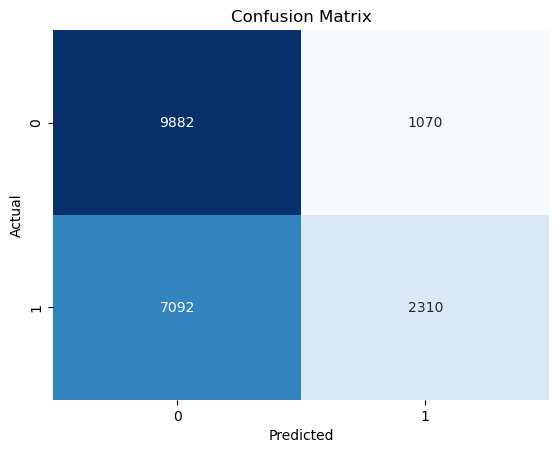

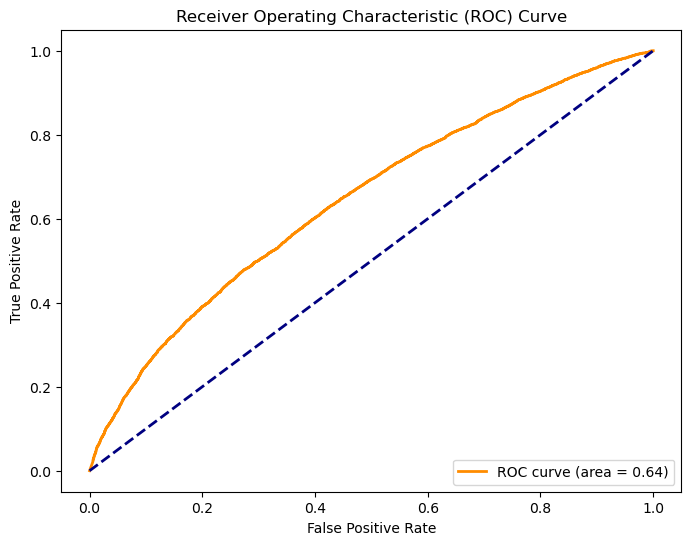

Best Parameters: {'var_smoothing': 3.5111917342151277e-07}


In [45]:

import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt


df = pd.read_excel('FinalV6.xlsx')

X = df.iloc[:, :-1]  
y = df.iloc[:, -1]  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes model
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# ROC and AUC
y_probs = nb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Parameter grid for GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# GridSearchCV
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


In [46]:
##RandomForestClassifier

Confusion Matrix:
[[7939 3013]
 [4420 4982]]
Accuracy: 0.6348137958140906
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68     10952
           1       0.62      0.53      0.57      9402

    accuracy                           0.63     20354
   macro avg       0.63      0.63      0.63     20354
weighted avg       0.63      0.63      0.63     20354



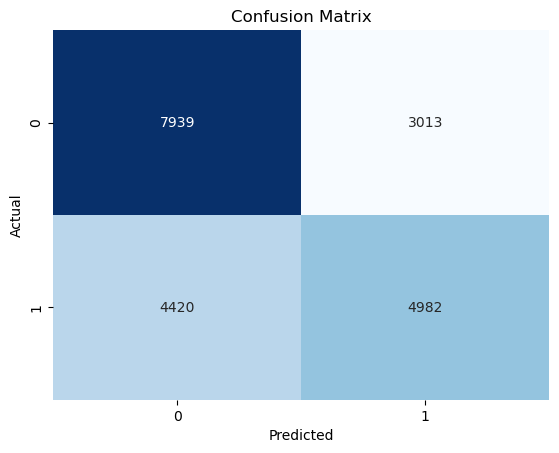

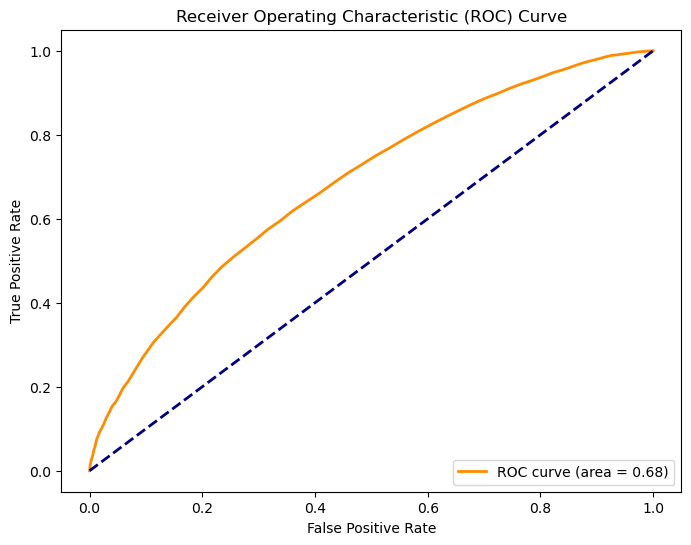

Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [47]:
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

df = pd.read_excel('FinalV6.xlsx')

X = df.iloc[:, :-1]  
y = df.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# ROC and AUC
y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Smaller Parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

# GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


In [48]:
##LogisticRegression

C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[8478 2474]
 [5448 3954]]
Accuracy: 0.6107890340964921
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.77      0.68     10952
           1       0.62      0.42      0.50      9402

    accuracy                           0.61     20354
   macro avg       0.61      0.60      0.59     20354
weighted avg       0.61      0.61      0.60     20354



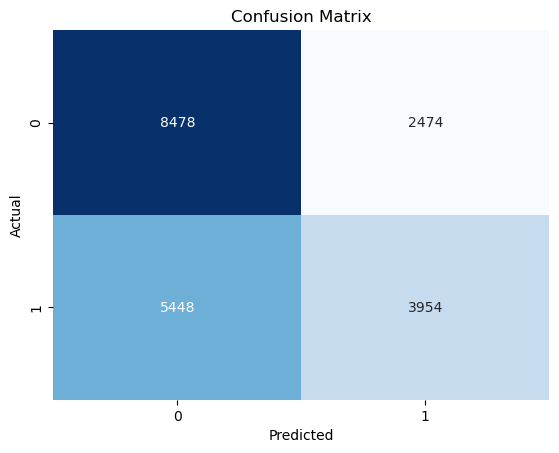

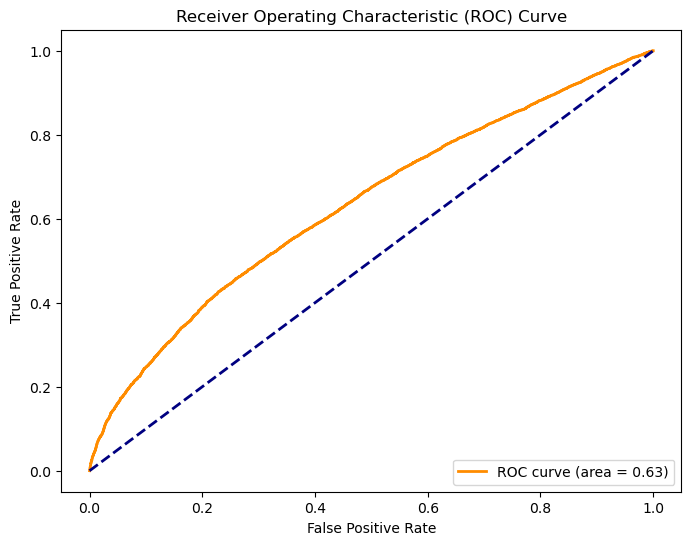

In [49]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt


df = pd.read_excel('FinalV6.xlsx')


X = df.iloc[:, :-1]  
y = df.iloc[:, -1]  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
lr_model = LogisticRegression(random_state=42)


lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# ROC and AUC
y_probs = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
##
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [50]:
##XGBClassifier

Confusion Matrix:
[[7805 3147]
 [4092 5310]]
Accuracy: 0.6443450918738332
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.71      0.68     10952
           1       0.63      0.56      0.59      9402

    accuracy                           0.64     20354
   macro avg       0.64      0.64      0.64     20354
weighted avg       0.64      0.64      0.64     20354



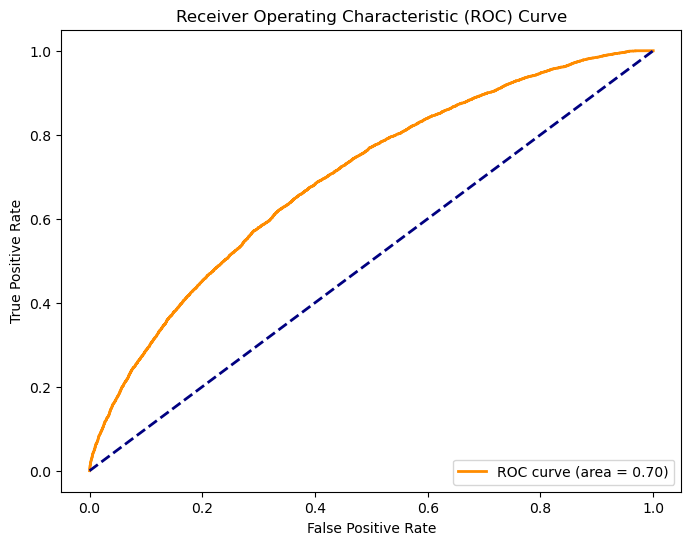

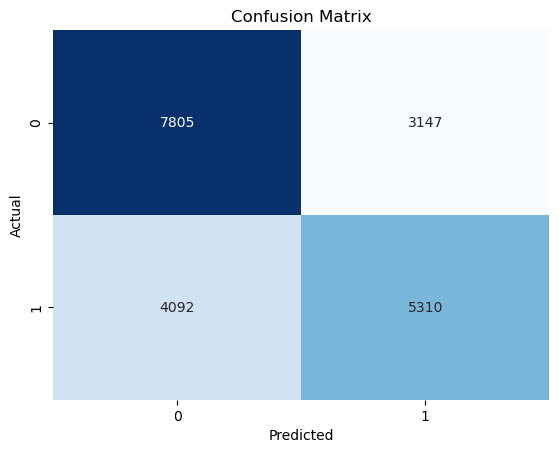

Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 200}


In [51]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt


df = pd.read_excel('FinalV6.xlsx')

X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# ROC and AUC
y_probs = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3]
}
##
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


In [52]:
##KNeighborsClassifier

C:\Users\yeswa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion Matrix:
[[6572 4380]
 [4845 4557]]
Accuracy: 0.5467721332416232
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59     10952
           1       0.51      0.48      0.50      9402

    accuracy                           0.55     20354
   macro avg       0.54      0.54      0.54     20354
weighted avg       0.55      0.55      0.55     20354



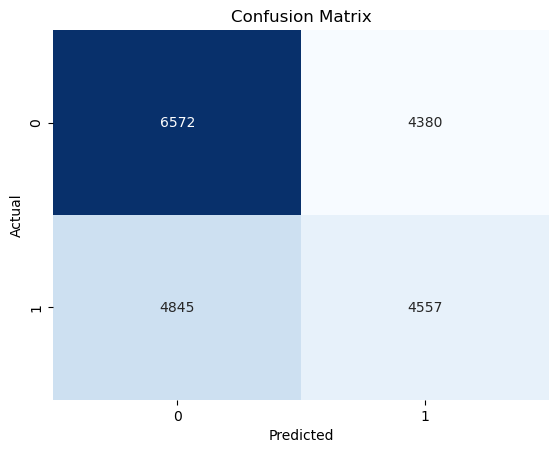

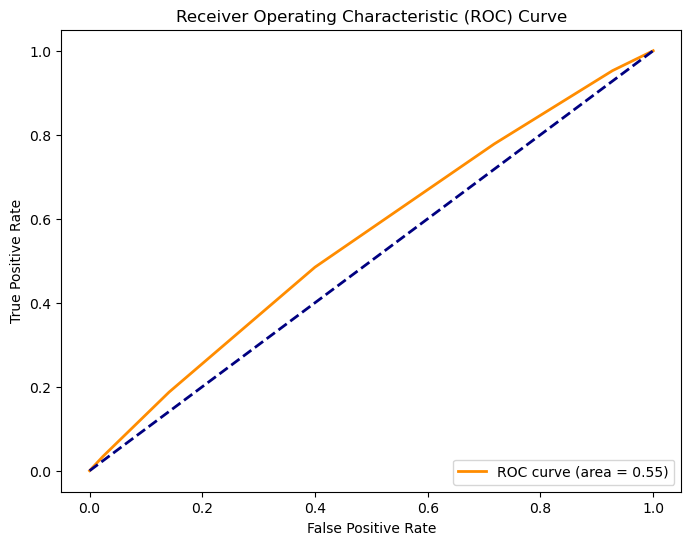

In [53]:

import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

df = pd.read_excel('FinalV6.xlsx')

X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN model
knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# ROC and AUC
y_probs = knn_model.predict_proba(X_test)  # KNN does not have predict_proba, use decision function as an approximation
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)
##
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [54]:
## DecisionTreeClassifier

Confusion Matrix:
[[6460 4492]
 [4434 4968]]


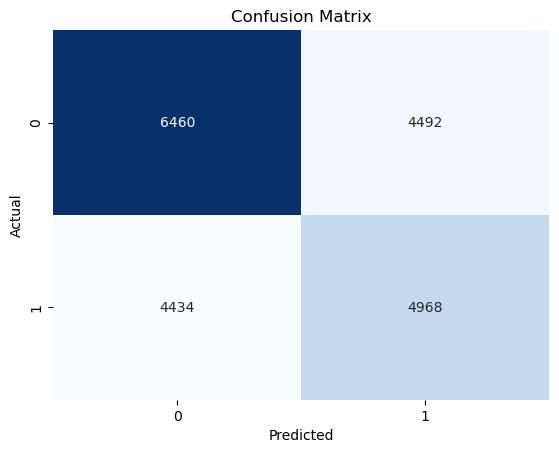

Accuracy: 0.5614621204677214
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59     10952
           1       0.53      0.53      0.53      9402

    accuracy                           0.56     20354
   macro avg       0.56      0.56      0.56     20354
weighted avg       0.56      0.56      0.56     20354



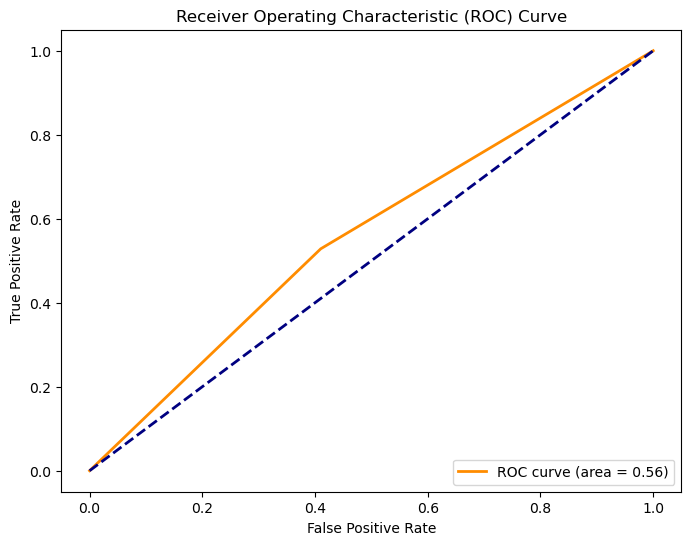

In [55]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('FinalV6.xlsx')

X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# ROC and AUC
y_probs = dt_model.predict_proba(X_test)  # Decision Trees don't have predict_proba, using decision function as an approximation
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [56]:
## NEURAL nETWORK

637/637 [==============================] - 1s 2ms/step
Confusion Matrix:
[[7986 2966]
 [4824 4578]]
Accuracy: 0.6172742458484819
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67     10952
           1       0.61      0.49      0.54      9402

    accuracy                           0.62     20354
   macro avg       0.62      0.61      0.61     20354
weighted avg       0.62      0.62      0.61     20354



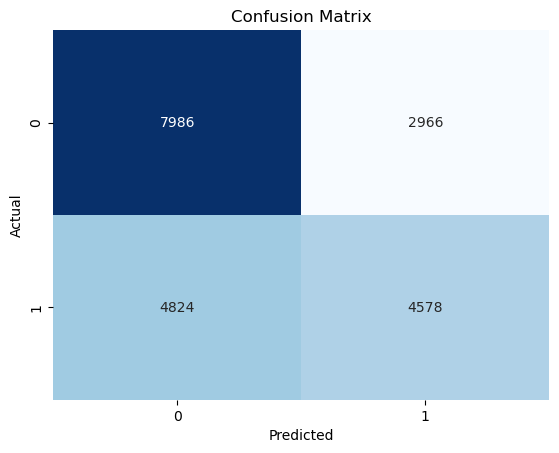

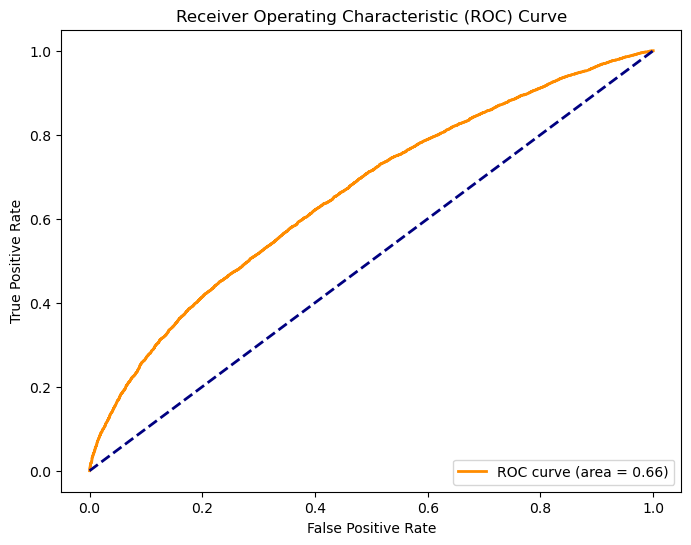

In [57]:

import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_excel('FinalV6.xlsx')


X = df.iloc[:, :-1]  
y = df.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural network model
nn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  
])


nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

y_probs = nn_model.predict(X_test)
y_pred = np.argmax(y_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])  
roc_auc = auc(fpr, tpr)
##
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
